In [1]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter

In [7]:
def E5contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.longitude,data.latitude
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos ERA-5 </font>**

In [8]:
fileu_era5='u_daily_500.nc'
filet2m_era5 = 't2m_daily.nc'

In [9]:
#archivo ERA 5
u_ds=xr.open_dataset(fileu_era5)
u=u_ds['u']  
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [10]:
#Covertir K a °C
t2m=t2m-273.15

In [11]:
#Seleccionar solo el nivel de 200 hPa (para el viento)
u79 = u.sel(level=200)

In [13]:
# Calcular promedio estacional
u_estacion=u79.groupby(u79.time.dt.season).mean(dim='time') 
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time') 

In [14]:
t2m_estacion

<xarray.DataArray 't2m' (season: 4, latitude: 89, longitude: 259)> Size: 738kB
array([[[ 6.57076375,  6.62119206,  6.66817931, ..., 12.00300638,
         12.08782613, 12.17483314],
        [ 6.88622653,  6.93435609,  6.98473984, ..., 12.37736695,
         12.4719328 , 12.5425178 ],
        [ 7.22286594,  7.26753973,  7.30528988, ..., 12.76444523,
         12.84478156, 12.92105495],
        ...,
        [26.2273009 , 26.196058  , 26.1660379 , ..., 25.79299672,
         25.77722803, 25.75664214],
        [26.17527012, 26.13874872, 26.10499771, ..., 25.80711151,
         25.78139285, 25.77352539],
        [26.14191189, 26.11078944, 26.08397614, ..., 25.84071582,
         25.82247802, 25.80557187]],

       [[12.48946572, 12.52068177, 12.55362946, ..., 18.20477742,
         18.22962239, 18.24759512],
        [12.96371664, 12.98459808, 12.99818359, ..., 18.6176265 ,
         18.63831057, 18.64025946],
        [13.43393779, 13.46098113, 13.46503253, ..., 19.01077306,
         19.0146167 , 19.01567385],
...
        [26.57395499, 26.56360977, 26.54972205, ..., 26.04496848,
         26.04959238, 26.04912397],
        [26.58580974, 26.56154251, 26.53863838, ..., 26.04828271,
         26.04331288, 26.05549901],
        [26.5913118 , 26.57508811, 26.55734277, ..., 26.07451718,
         26.07328396, 26.071709  ]],

       [[11.62342061, 11.67233051, 11.72317231, ..., 16.3524659 ,
         16.37773204, 16.40564426],
        [12.03265759, 12.08068439, 12.11689521, ..., 16.76816088,
         16.80210472, 16.81872021],
        [12.45860504, 12.50861601, 12.53021883, ..., 17.17756452,
         17.20570795, 17.22069342],
        ...,
        [26.62244908, 26.59136469, 26.56052677, ..., 26.34320438,
         26.30865315, 26.27431897],
        [26.54208856, 26.50385584, 26.46917924, ..., 26.30029569,
         26.25692152, 26.23460842],
        [26.48290154, 26.44886531, 26.41680509, ..., 26.24318992,
         26.20613193, 26.16690628]]])
Coordinates:
  * longitude  (longitude) float32 1kB 195.5 196.0 196.5 ... 323.5 324.0 324.5
  * latitude   (latitude) float32 356B 44.5 44.0 43.5 43.0 ... 2.0 1.5 1.0 0.5
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'

In [15]:
#seleccionar inviernos
invs_E5 = t2m_estacion[0]

In [16]:
lats=t2m.latitude
lons=t2m.longitude
vlats=u79.latitude
vlons=u79.longitude

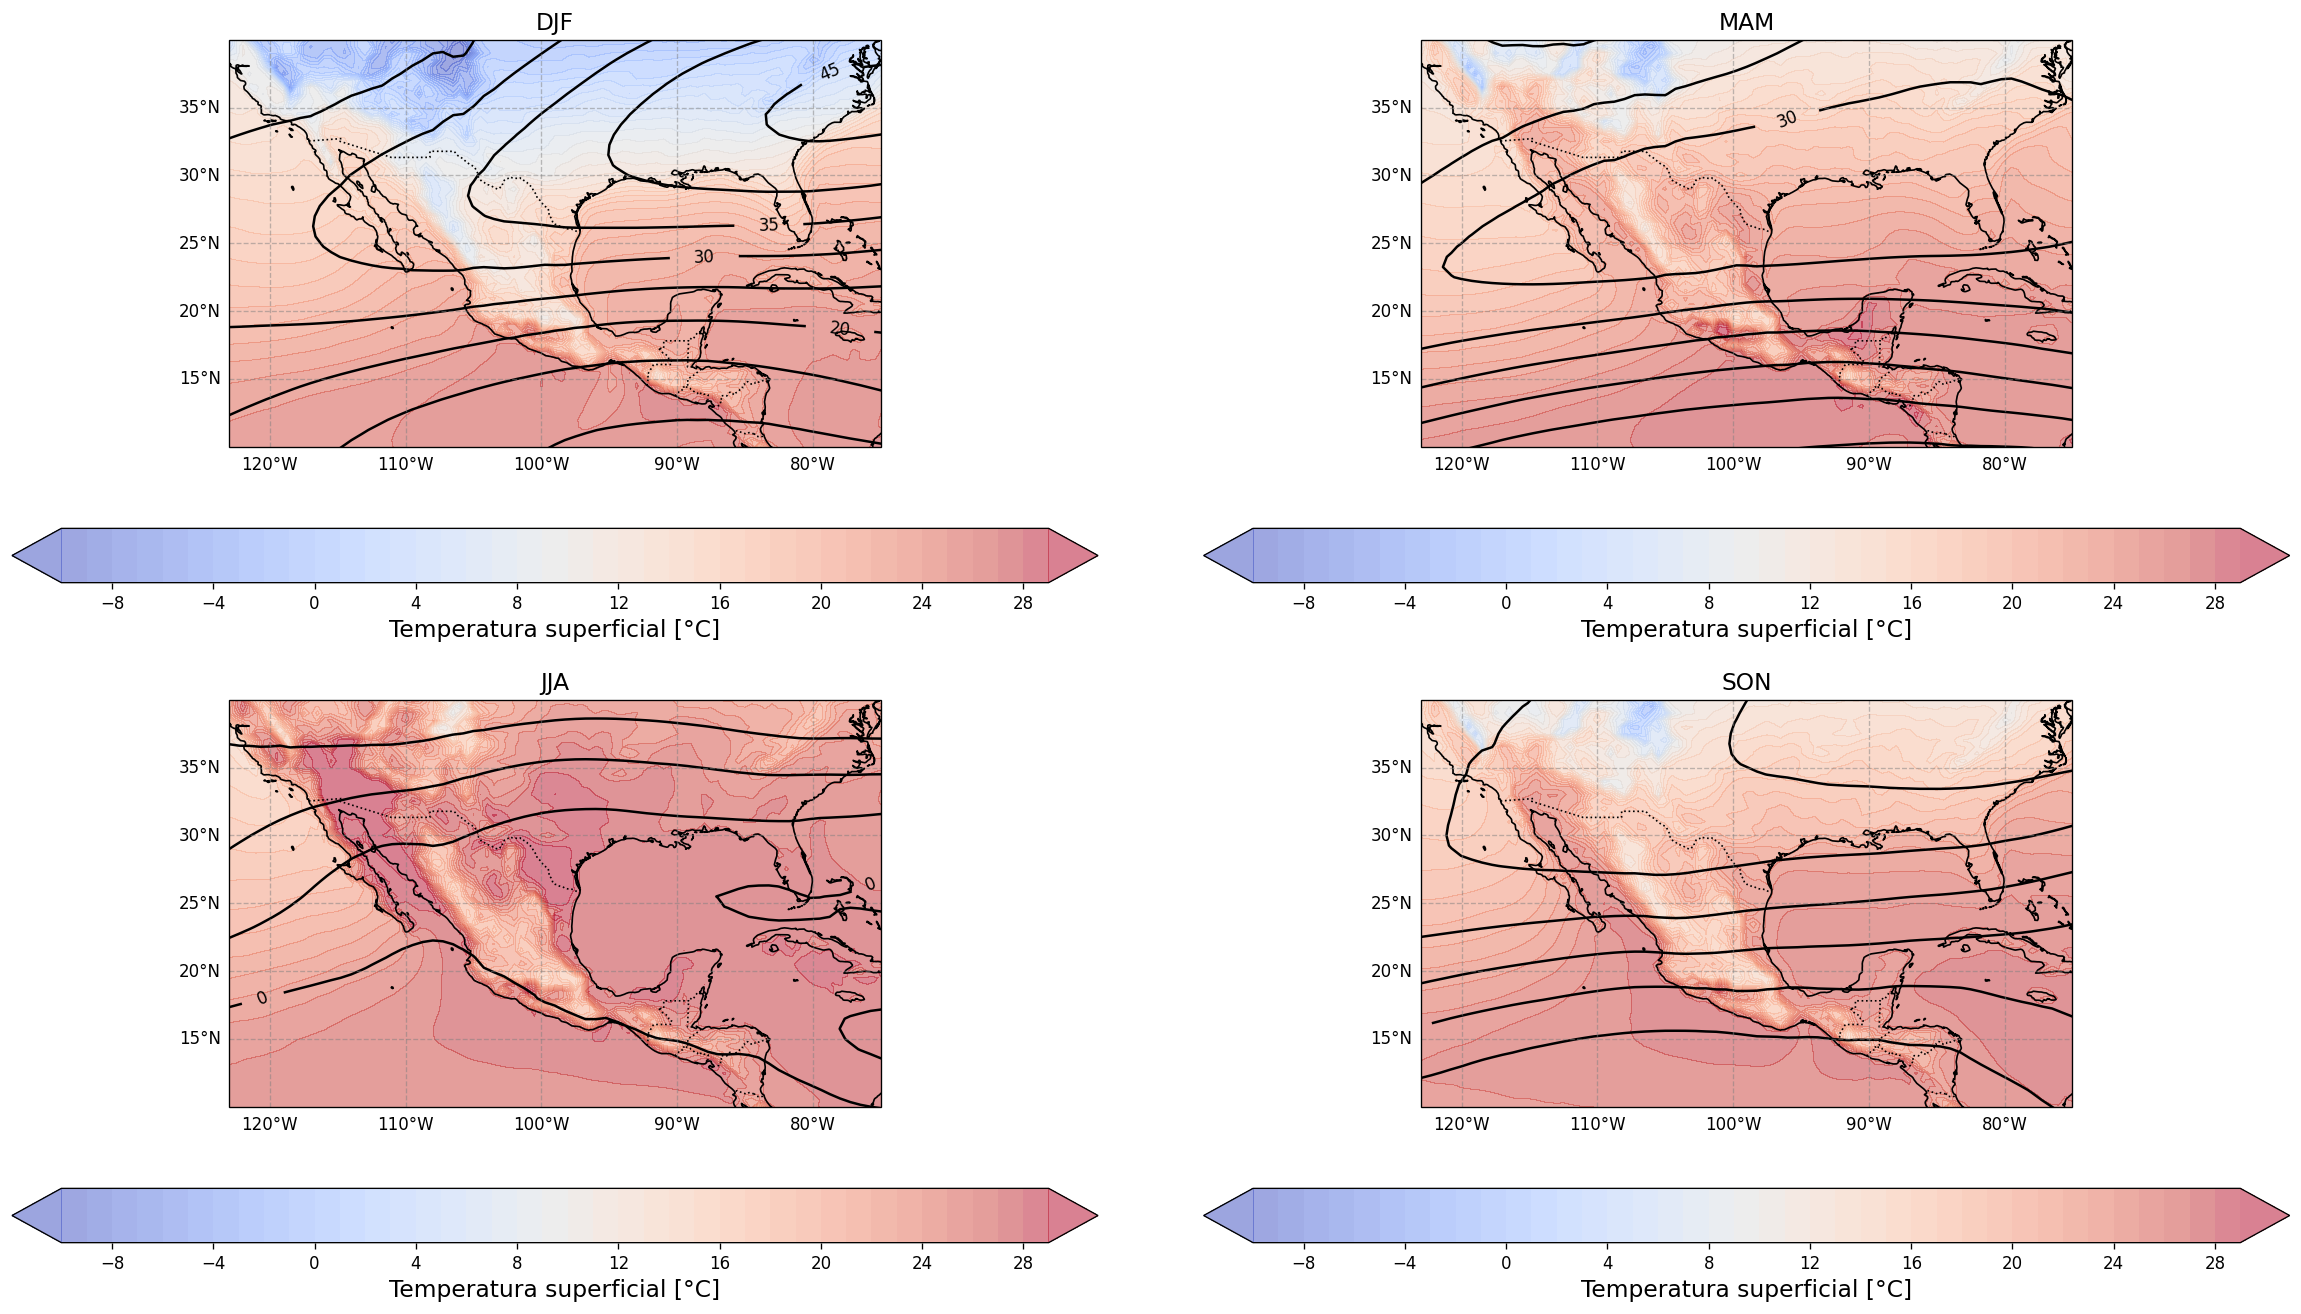

In [17]:
fig = plt.figure(figsize=(20, 11),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    mean_viento=u_estacion.sel(season=season)
    mean_temperatura=t2m_estacion.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()
    
    cs=ax.contourf(lons,lats,mean_temperatura,levels=np.arange(-10,30,1),cmap='coolwarm',alpha=0.5,extend='both',transform=ccrs.PlateCarree()) #temperatura
    csv=ax.contour(vlons,vlats,mean_viento,levels=np.arange(0,50,5),colors='k',transform=ccrs.PlateCarree()) #viento 
    ax.clabel(csv, csv.levels, inline=True, fontsize=10)
    
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
    plt.title(season,fontsize=14)
    #plt.savefig(f"figura_{season}.png")
plt.tight_layout(h_pad=2,pad=1)
plt.show()

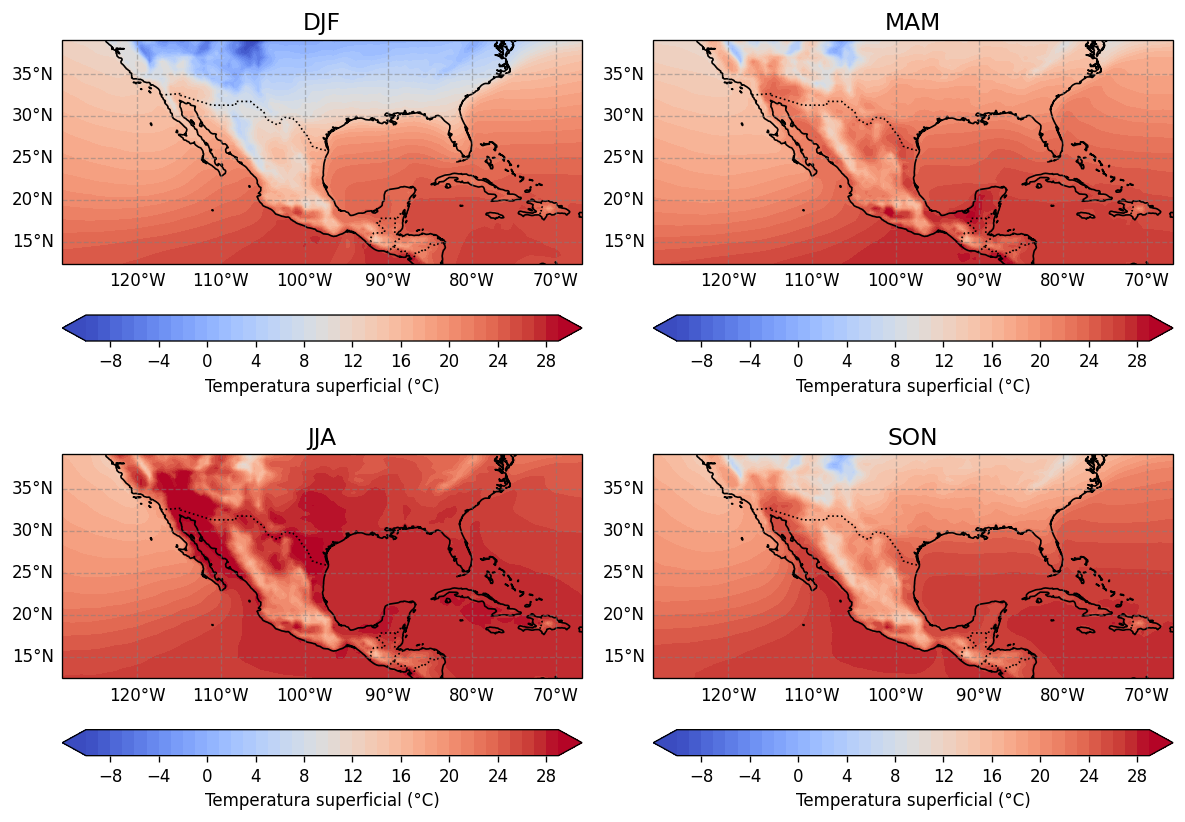

In [18]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    mean_temperatura=t2m_estacion.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()
    
    datatemp, lon = add_cyclic_point(mean_temperatura, coord=lons)
    
    cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
    ax.clabel(csv, csv.levels, inline=True, fontsize=10)
    
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231.08,293.13, 12.41,39.13], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Temperatura superficial (°C)')
    plt.title(season,fontsize=14)

plt.tight_layout(h_pad=2)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Invierno </i> </h1>

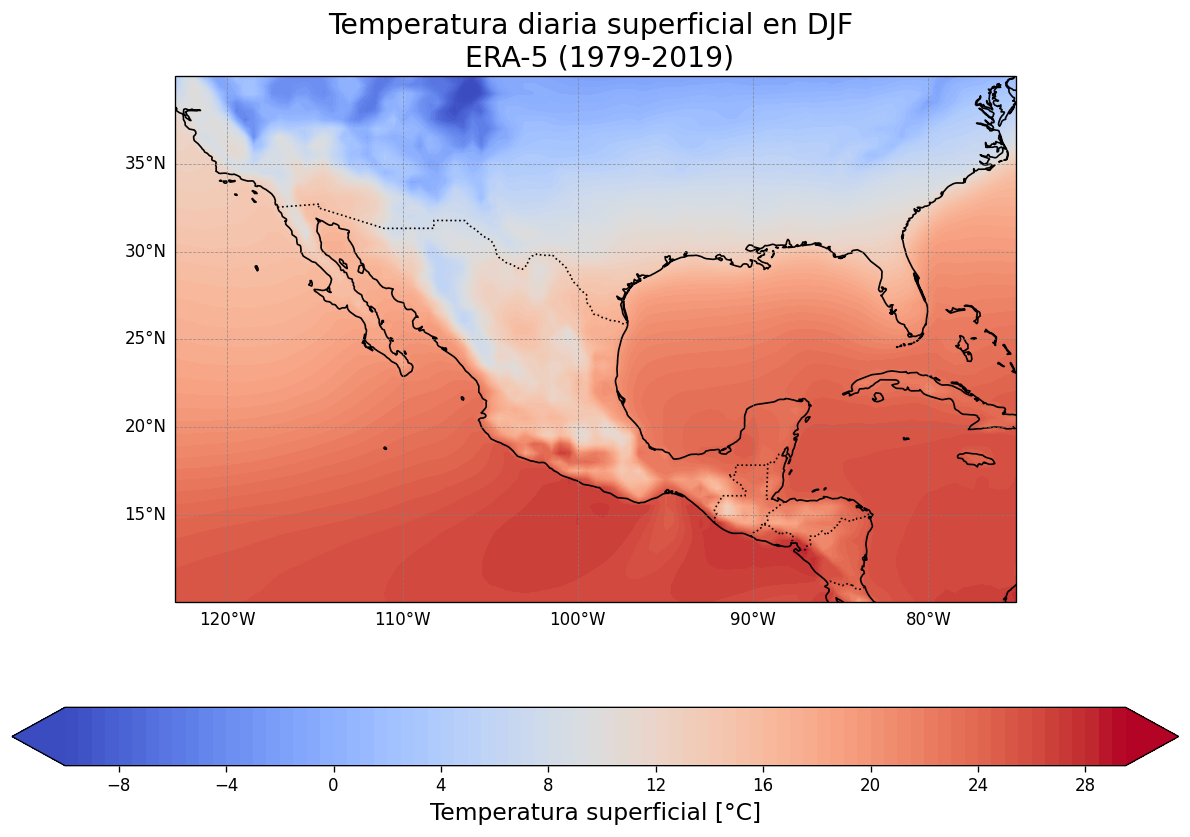

In [19]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(lons,lats,invs_E5,levels=np.arange(-10,30,0.5),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura diaria superficial en DJF \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

#### <h1  style="color:purple; font-size:20px;"><i> Desviación estándar de temperatura superficial </i> </h1>

In [20]:
anualE5_desv=t2m.groupby(t2m.time.dt.year).std(dim='time').mean(dim='year') # Desviación de temperatura anual
seasonE5_desv=t2m.groupby(t2m.time.dt.season).std(dim='time') # Desviación de temperatura por estación
desv_invE5=seasonE5_desv[0]

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anual </i> </h1>

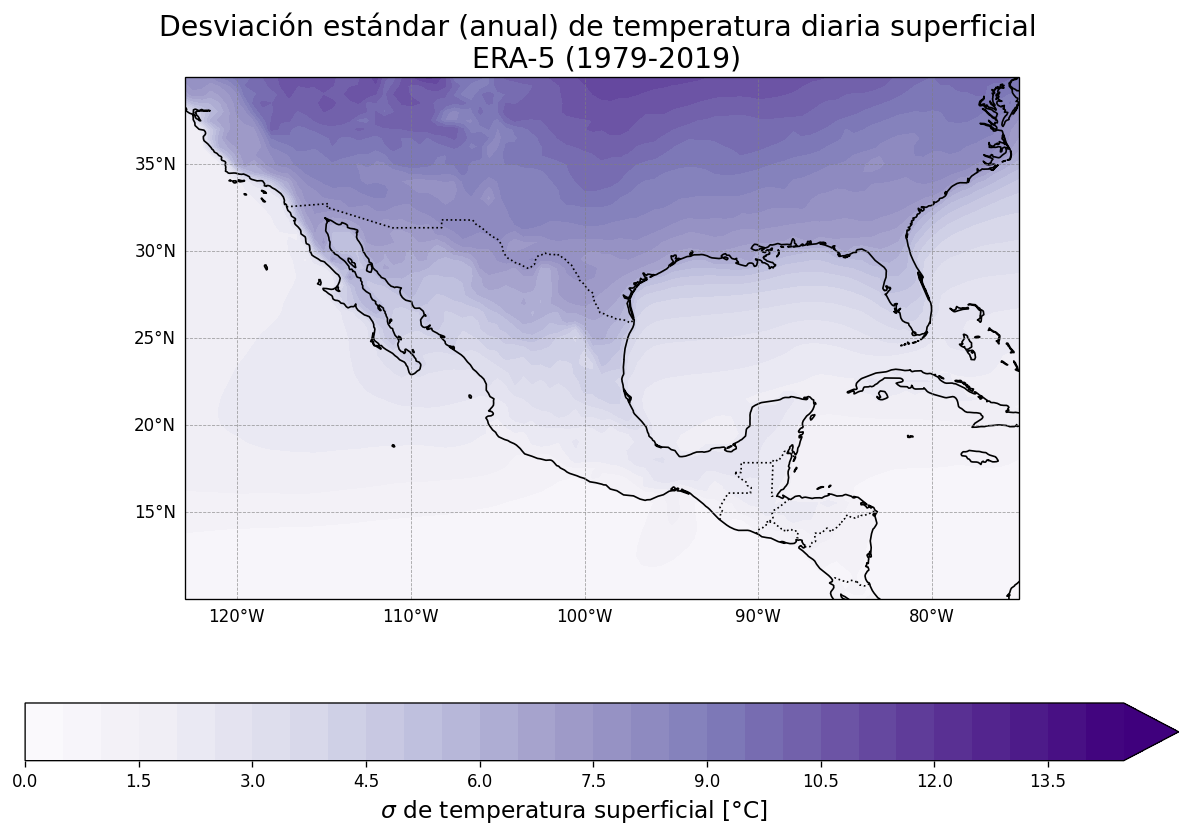

In [21]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

cs=ax.contourf(lons,lats,anualE5_desv,levels=np.arange(0,15,0.5),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=14)
plt.title('Desviación estándar (anual) de temperatura diaria superficial \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estacional </i> </h1>

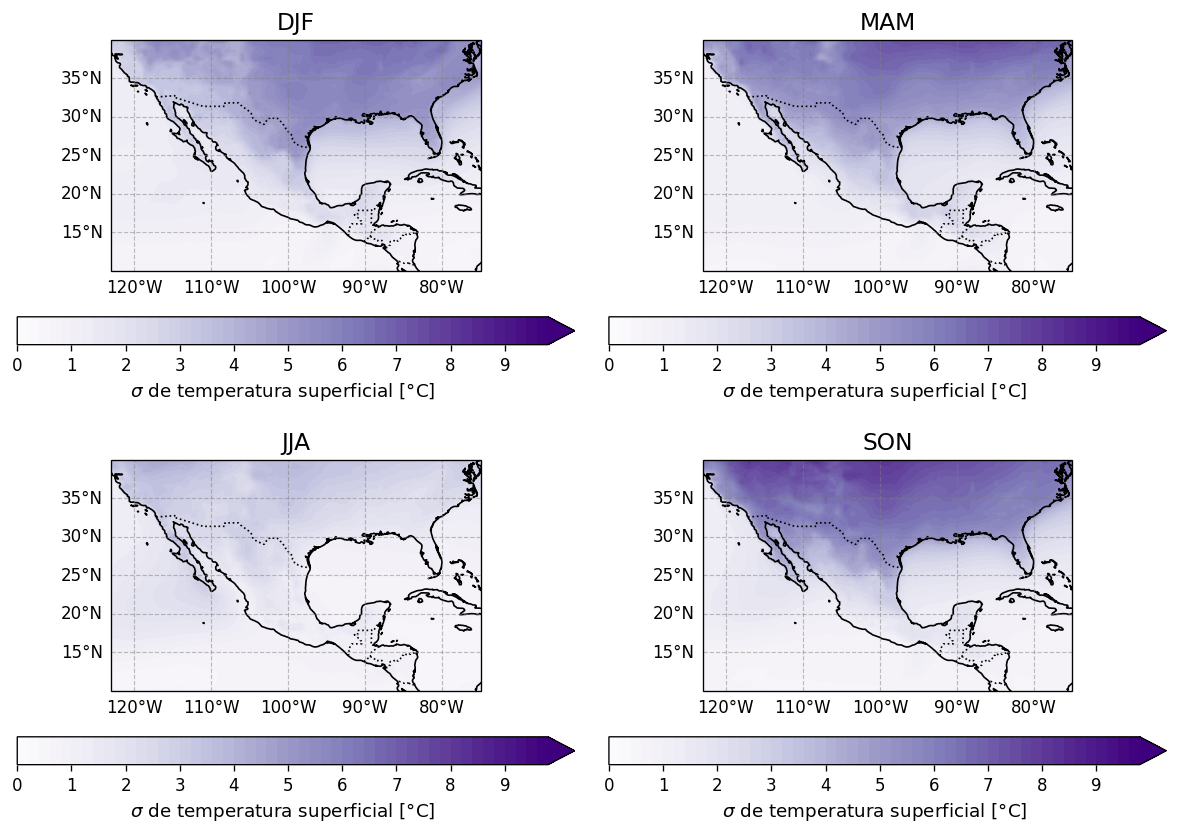

In [22]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    seasonsE5_desv=seasonE5_desv.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    cs=ax.contourf(lons,lats,seasonsE5_desv,levels=np.arange(0,10,0.2),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (anual vs estacional) </i> </h1>

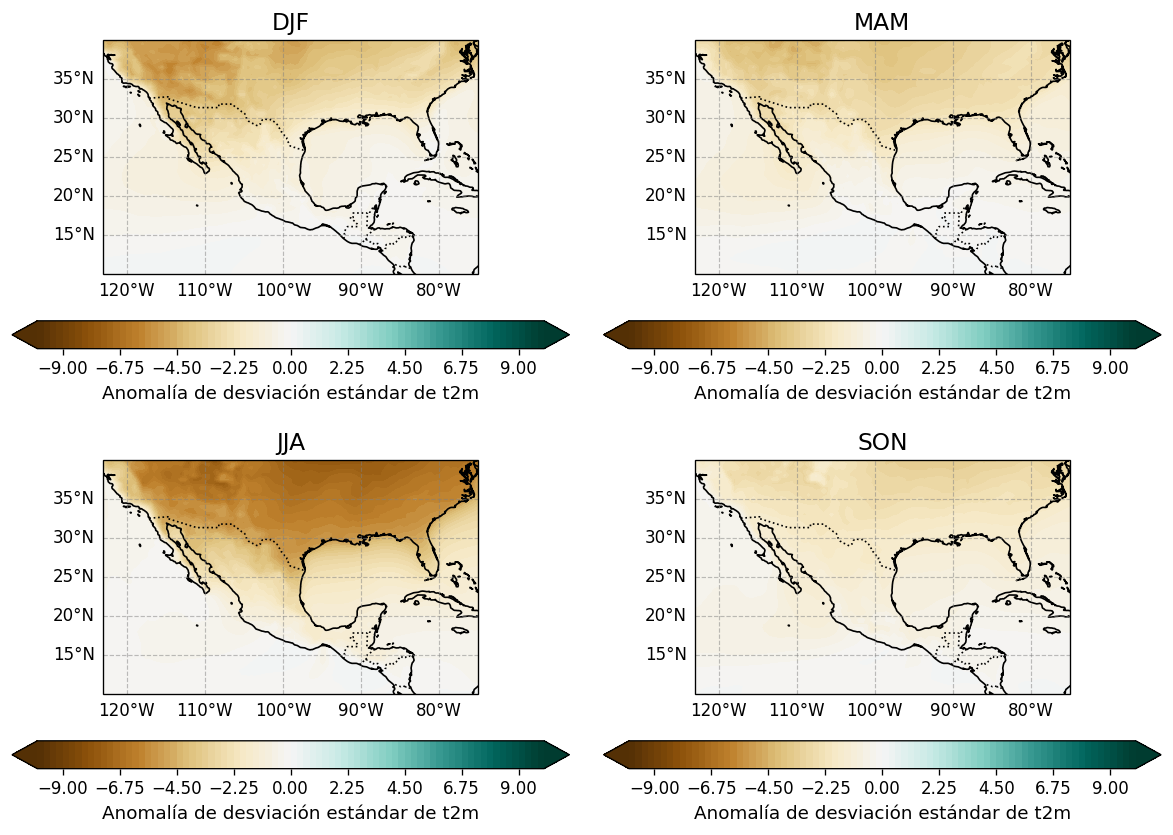

In [23]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia = seasonE5_desv - anualE5_desv

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()
    
    cs=ax.contourf(lons,lats,desv_temp,levels=np.arange(-10,10.25,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de t2m', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (promedio estacional vs estacional) </i> </h1>

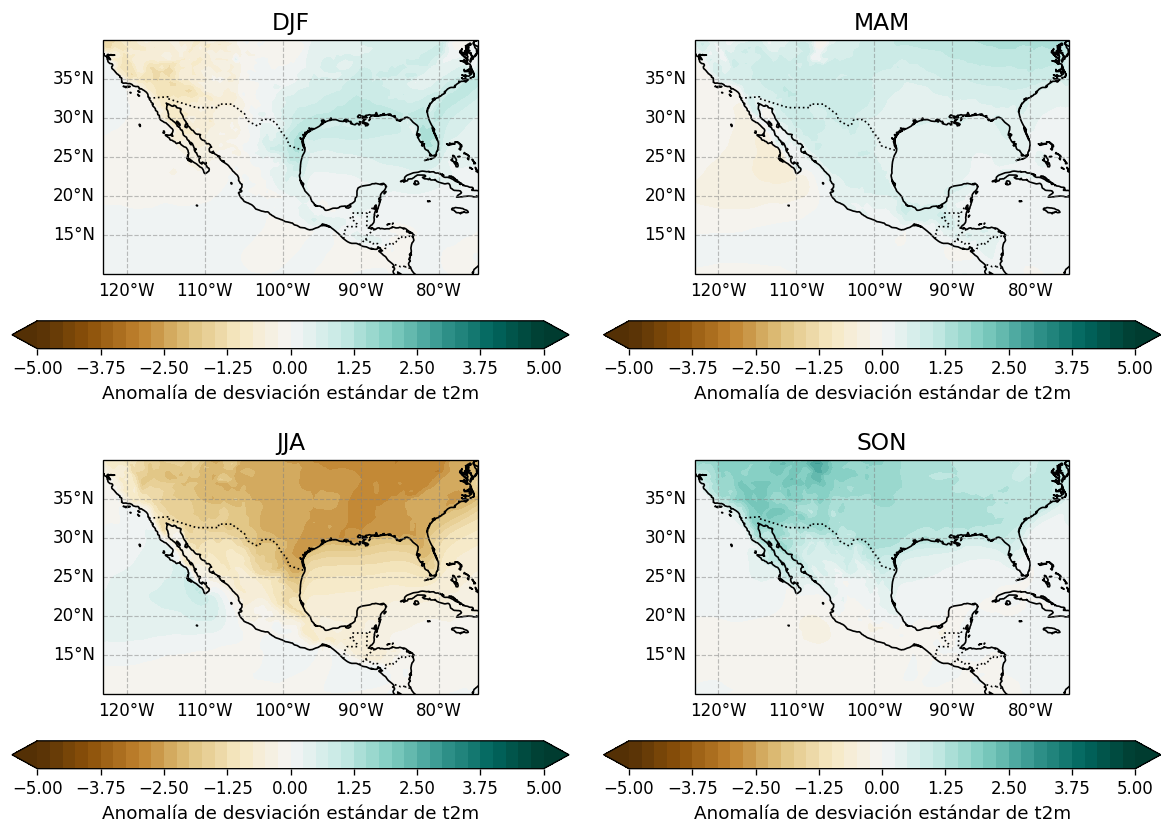

In [24]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia_season = seasonE5_desv - seasonE5_desv.mean('season') 

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia_season.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()
    cs=ax.contourf(lons,lats,desv_temp,levels=np.arange(-5,5.1,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de t2m', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:purple; font-size:20px;"><i> Cálculo de eventos CAO </i> </h1>

In [17]:
def E5_CAOS_MX(Tdias):
    """
    Esta función identifica los días cuando se cumple la condición de CAO (Cold Air Outbreak)
    y devuelve las fechas correspondientes en un calendario estándar.
    
    Parámetros:
    - Tdias (xarray.DataArray): Temperatura diaria en invierno durante ~30 años.
    
    Retorna:
    - lista de fechas
    - medidas de frecuencia de caos.
    - temperatura
    """
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []
    print(condicionCAO)
    #return
    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)

    promedioT=np.mean(temp_list)
    
    dicc={'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}
    
    return dicc

In [18]:
#datos solo de inviernos (de los 40 años)
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [19]:
t2m_inviernos.latitude

<xarray.DataArray 'latitude' (latitude: 89)> Size: 356B
array([44.5, 44. , 43.5, 43. , 42.5, 42. , 41.5, 41. , 40.5, 40. , 39.5, 39. ,
       38.5, 38. , 37.5, 37. , 36.5, 36. , 35.5, 35. , 34.5, 34. , 33.5, 33. ,
       32.5, 32. , 31.5, 31. , 30.5, 30. , 29.5, 29. , 28.5, 28. , 27.5, 27. ,
       26.5, 26. , 25.5, 25. , 24.5, 24. , 23.5, 23. , 22.5, 22. , 21.5, 21. ,
       20.5, 20. , 19.5, 19. , 18.5, 18. , 17.5, 17. , 16.5, 16. , 15.5, 15. ,
       14.5, 14. , 13.5, 13. , 12.5, 12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,
        8.5,  8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5,  3. ,
        2.5,  2. ,  1.5,  1. ,  0.5], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 356B 44.5 44.0 43.5 43.0 ... 2.0 1.5 1.0 0.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [20]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE5 = t2m_inviernos.sel(latitude=slice(27,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [21]:
mx_slicedE5

<xarray.DataArray 't2m' (time: 3669, latitude: 11, longitude: 15)> Size: 5MB
array([[[10.72883018, 11.05836085, 11.67640872, ...,  9.54596826,
          9.41941241,  9.76752469],
        [ 9.0773266 , 11.25455589, 11.85803979, ..., 12.04946388,
         11.63338643, 11.83636125],
        [ 8.05927186, 11.25622991, 12.63101813, ..., 12.81499284,
         12.86027505, 13.09062009],
        ...,
        [14.00505304, 10.71970678, 10.82475148, ..., 18.98618069,
         18.67598495, 19.81398316],
        [16.69235597, 13.36390371, 12.67705366, ..., 18.93152397,
         21.38421311, 21.52508182],
        [20.15765929, 16.53692329, 13.11037351, ..., 19.46101622,
         21.53596295, 21.87244079]],

       [[ 4.75994754,  4.24225712,  4.25054351, ...,  1.25672768,
          0.95649235,  1.00077016],
        [ 3.6549275 ,  4.54969073,  4.85854727, ...,  2.71647237,
          2.04686472,  1.78630364],
        [ 2.69897887,  3.86191997,  4.85394371, ...,  3.16284958,
          2.79490017,  2.53040515],
...
        [18.24291742, 16.04768106, 17.53968223, ..., 24.72848894,
         23.89971662, 24.33353791],
        [21.10892947, 18.81980399, 19.28600364, ..., 24.87593625,
         25.45963931, 23.539903  ],
        [23.63866104, 21.32105234, 17.62569992, ..., 25.31365268,
         25.62055731, 24.9643884 ]],

       [[20.05496932, 21.03849234, 22.436929  , ..., 23.2674866 ,
         23.06891557, 23.03897168],
        [18.69864888, 21.51856843, 22.91221731, ..., 24.06915524,
         23.96869307, 23.68848638],
        [17.9553262 , 20.30011974, 22.33671027, ..., 24.70795831,
         24.399593  , 24.0123511 ],
        ...,
        [17.70546916, 16.43735742, 18.34930345, ..., 24.91285894,
         24.16036645, 24.67768982],
        [19.63964995, 18.39101392, 19.27805106, ..., 25.4406505 ,
         25.89508358, 23.85297493],
        [21.75333181, 20.18951398, 17.59957002, ..., 25.63313537,
         25.61731136, 25.09187311]]])
Coordinates:
  * time       (time) datetime64[ns] 29kB 1979-01-01T11:30:00 ... 2019-02-28T...
  * longitude  (longitude) float32 60B 255.0 255.5 256.0 ... 261.0 261.5 262.0
  * latitude   (latitude) float32 44B 27.0 26.5 26.0 25.5 ... 23.0 22.5 22.0

In [ ]:
tempsE5 = np.zeros((len(mx_slicedE5.latitude), len(mx_slicedE5.longitude)))  # matriz que voy a llenar
freqsE5 = np.zeros((len(mx_slicedE5.latitude), len(mx_slicedE5.longitude)))

for ilatitude, latitude in enumerate(mx_slicedE5.latitude):  # para cada latitud 
    for ilongitude, longitude in enumerate(mx_slicedE5.longitude):  # para cada longitud
        temp_data = t2m_inviernos.sel(latitude=latitude.item(), longitude=longitude.item())
        
        # Eliminar dimensiones innecesarias
        temp_series = temp_data.squeeze()  
        
        # Llamar a la función que devuelve la salida
        output = E5_CAOS_MX(temp_series)
        
        # Guardar los resultados en las matrices correspondientes
        tempsE5[ilatitude, ilongitude] = np.mean(output['temperaturas'])
        freqsE5[ilatitude, ilongitude] = output['freq']


In [31]:
tempsE5

array([[2.96045785, 3.05419161, 3.58545351, 3.77990764, 3.22880537],
       [2.73661116, 3.79259639, 4.39228598, 4.6016186 , 3.19303546],
       [2.28070374, 3.82337067, 4.73962441, 5.41027572, 4.73614405],
       [4.33715139, 4.08196857, 4.56234571, 5.61064413, 5.55674214],
       [2.54736734, 4.66969475, 5.14621814, 5.44568178, 5.31664426]])

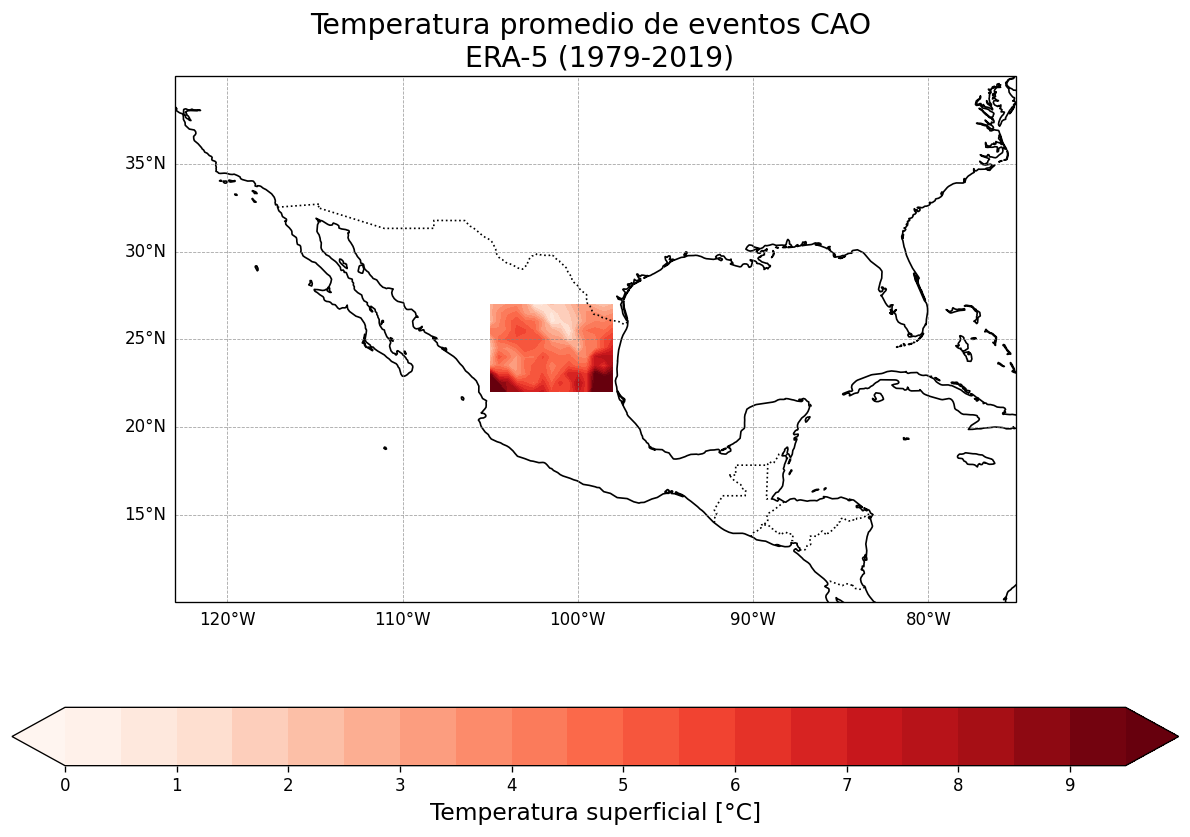

In [51]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

cs=ax.contourf(mx_slicedE5.longitude,mx_slicedE5.latitude,tempsE5,levels=np.arange(0,10,0.5),cmap='Reds',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-123, -75, 10, 40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura promedio de eventos CAO \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

##### peso

In [22]:
weights = np.cos(np.deg2rad(mx_slicedE5))
weights.name = "weights"

In [23]:
t2m_weighted = mx_slicedE5.weighted(weights)

In [24]:
norteE5 = t2m_weighted.mean(['longitude','latitude']) #promedio a variable ya pesada
norteE5 

<xarray.DataArray 't2m' (time: 3669)> Size: 29kB
array([12.70385005,  5.15118216,  4.68601582, ..., 18.57529558,
       19.898325  , 20.90318976])
Coordinates:
  * time     (time) datetime64[ns] 29kB 1979-01-01T11:30:00 ... 2019-02-28T11...

In [25]:
E5_resultadosCAO = E5_CAOS_MX(norteE5) #esto llamó a mi función con el que ya está pesado
E5_fechas_CAO = list(E5_resultadosCAO['fechas'].keys())
E5_fechas_cao = E5_resultadosCAO['fechas']#.keys()
E5_fechas_df = pd.to_datetime(E5_fechas_CAO)  #para que tenga un formato ok

# Extraer los años de las fechas
añosE5 = E5_fechas_df.year

# Contar cuántas veces se repite cada año
conteo_añosE5 = Counter(añosE5)

# Imprimir el resultado
print("CAOS por año:", conteo_añosE5)

E5_temps_selec = t2m_inviernos.isel(time=añosE5)
E5_temps_selec

<xarray.DataArray 't2m' ()> Size: 8B
array(8.03601693)
CAOS por año: Counter({1997: 11, 1985: 8, 1981: 5, 1987: 5, 1988: 5, 1983: 3, 1986: 3, 1989: 3, 2004: 3, 2010: 3, 2011: 3, 2017: 3, 1979: 2, 1992: 2, 1996: 2, 2001: 2, 2002: 2, 2007: 2, 2018: 2})


<xarray.DataArray 't2m' (time: 69, latitude: 89, longitude: 259)> Size: 13MB
array([[[ 4.40948738,  4.36938906,  4.35396662, ...,  8.91250429,
          9.18627331,  9.44795448],
        [ 4.64824331,  4.67233565,  4.70293043, ...,  9.04688786,
          9.37976231,  9.66711975],
        [ 4.71676893,  4.77445717,  4.8424826 , ...,  9.42811373,
          9.33983072,  9.36600717],
        ...,
        [25.10164035, 25.00277005, 24.88706012, ..., 25.71028457,
         25.7090341 , 25.60916343],
        [25.08063249, 25.00460407, 24.92223994, ..., 25.62200156,
         25.63333914, 25.63792418],
        [25.13123474, 25.07713118, 24.99951883, ..., 25.56072866,
         25.49537089, 25.5488909 ]],

       [[ 4.40948738,  4.36938906,  4.35396662, ...,  8.91250429,
          9.18627331,  9.44795448],
        [ 4.64824331,  4.67233565,  4.70293043, ...,  9.04688786,
          9.37976231,  9.66711975],
        [ 4.71676893,  4.77445717,  4.8424826 , ...,  9.42811373,
          9.33983072,  9.36600717],
...
        [25.30448382, 25.30338469, 25.30313104, ..., 24.9088822 ,
         25.00239265, 25.05219162],
        [25.3380495 , 25.34379879, 25.35656558, ..., 24.76362818,
         24.68736559, 24.66022558],
        [25.35462097, 25.36459767, 25.33509031, ..., 24.94447705,
         24.84733102, 24.7325144 ]],

       [[ 3.10801213,  3.0892424 ,  3.06506158, ..., 11.89604955,
         12.06996545, 12.33223436],
        [ 3.35269498,  3.39310908,  3.50150003, ..., 12.49845636,
         12.65571625, 12.86294419],
        [ 3.67854423,  3.78127044,  3.84738723, ..., 13.11591278,
         13.26158954, 13.46416733],
        ...,
        [25.30448382, 25.30338469, 25.30313104, ..., 24.9088822 ,
         25.00239265, 25.05219162],
        [25.3380495 , 25.34379879, 25.35656558, ..., 24.76362818,
         24.68736559, 24.66022558],
        [25.35462097, 25.36459767, 25.33509031, ..., 24.94447705,
         24.84733102, 24.7325144 ]]])
Coordinates:
  * time       (time) datetime64[ns] 552B 2000-12-25T11:30:00 ... 2001-02-02T...
  * longitude  (longitude) float32 1kB 195.5 196.0 196.5 ... 323.5 324.0 324.5
  * latitude   (latitude) float32 356B 44.5 44.0 43.5 43.0 ... 2.0 1.5 1.0 0.5

In [26]:
E5_listindex=[E5_fechas_cao[key] for key in E5_resultadosCAO['fechas'].keys()]

In [27]:
E5_temps_selec = t2m_inviernos.isel(time=E5_listindex)

In [28]:
E5_total_caos=E5_temps_selec.mean('time')
E5_total_caos #es el promedio del total de CAOS

<xarray.DataArray 't2m' (latitude: 89, longitude: 259)> Size: 184kB
array([[ 6.15594968,  6.22239109,  6.28680288, ..., 12.66278659,
        12.74966968, 12.81437049],
       [ 6.44603482,  6.51367893,  6.57845647, ..., 12.95981316,
        13.05530082, 13.11482127],
       [ 6.78290771,  6.84218098,  6.88389287, ..., 13.2798331 ,
        13.3533852 , 13.41670017],
       ...,
       [26.11293347, 26.07843185, 26.06230556, ..., 25.68032192,
        25.66120457, 25.63523072],
       [26.0815354 , 26.04078009, 26.01010095, ..., 25.68670601,
        25.66002498, 25.65546407],
       [26.06837463, 26.03716864, 26.01327089, ..., 25.73783328,
        25.72546081, 25.72180231]])
Coordinates:
  * longitude  (longitude) float32 1kB 195.5 196.0 196.5 ... 323.5 324.0 324.5
  * latitude   (latitude) float32 356B 44.5 44.0 43.5 43.0 ... 2.0 1.5 1.0 0.5

In [29]:
E5_anomalia=E5_total_caos-invs_E5

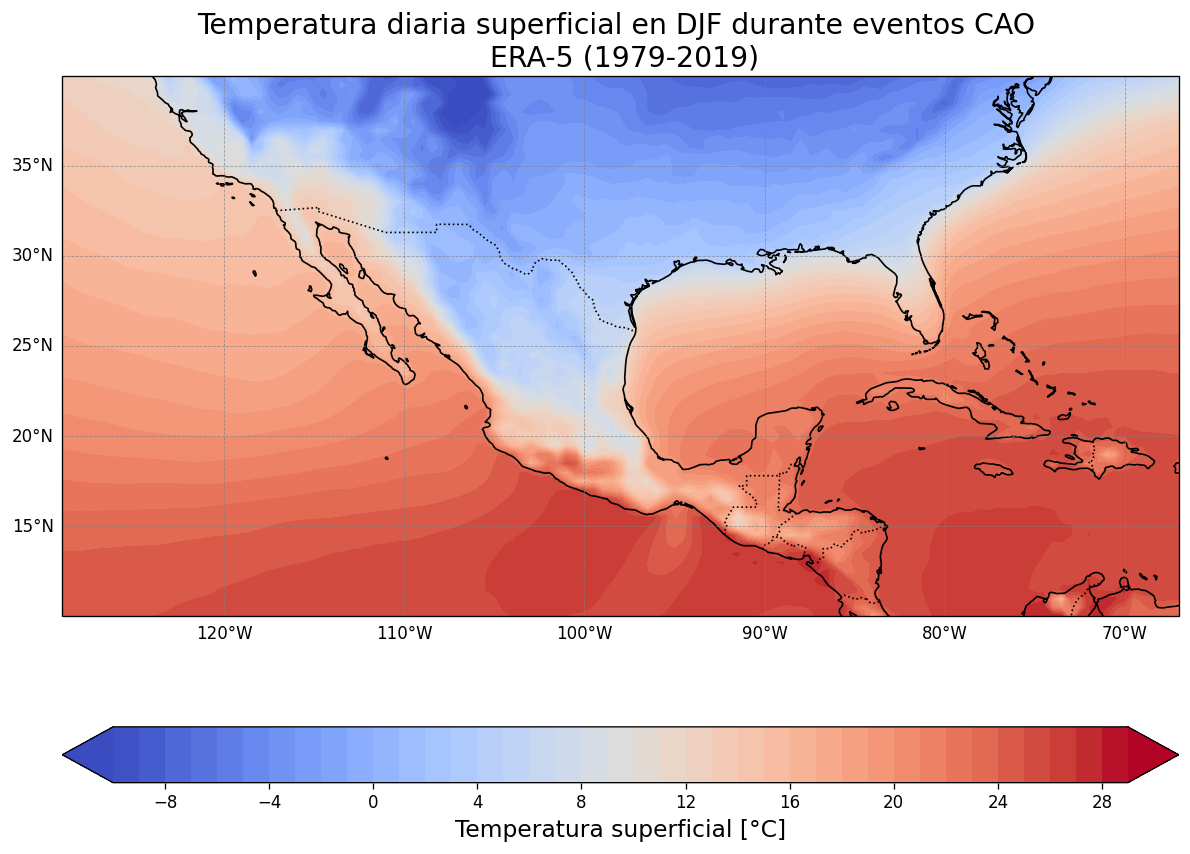

In [60]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(lons,lats,E5_total_caos,levels=np.arange(-10,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura diaria superficial en DJF durante eventos CAO \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

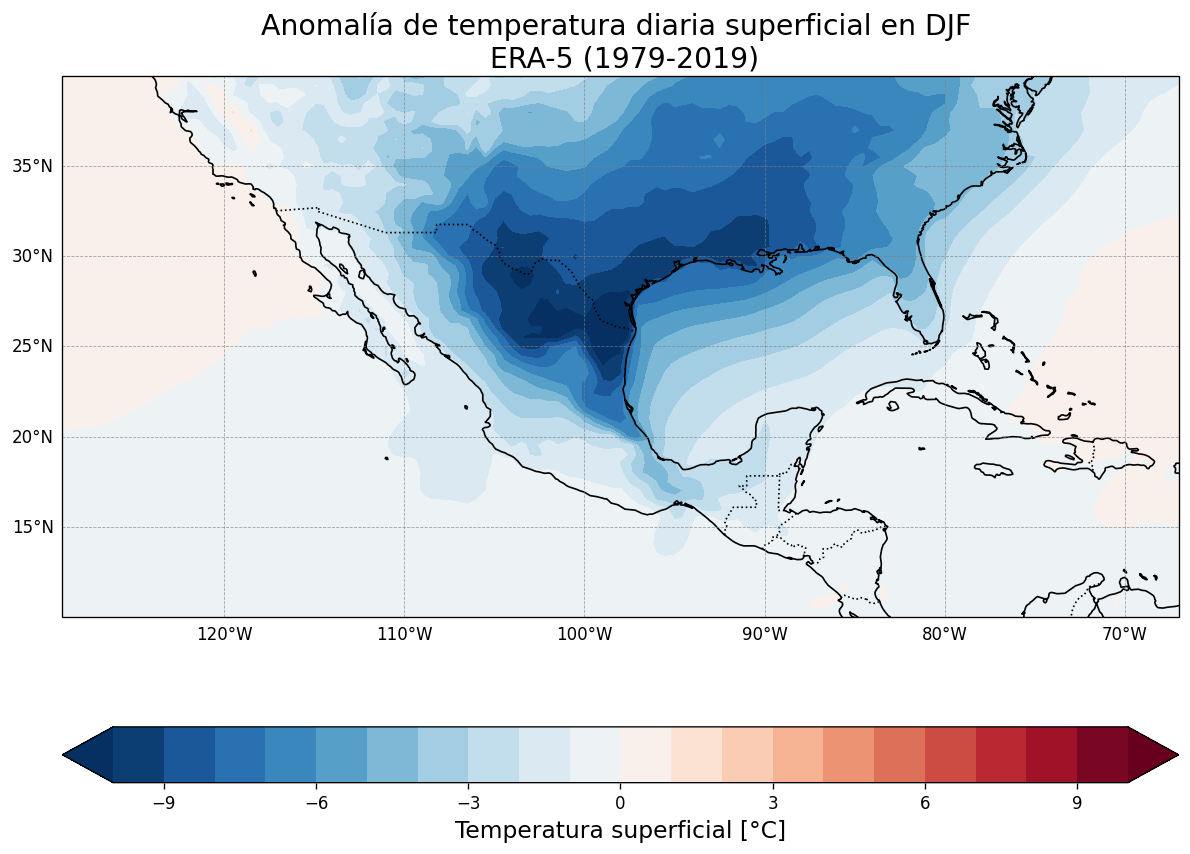

In [61]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(lons,lats,E5_anomalia,levels=np.arange(-10,10.1,1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Anomalía de temperatura diaria superficial en DJF \n ERA-5 (1979-2019)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatura superficial vs temperatra superficial en CAOS </i> </h1>

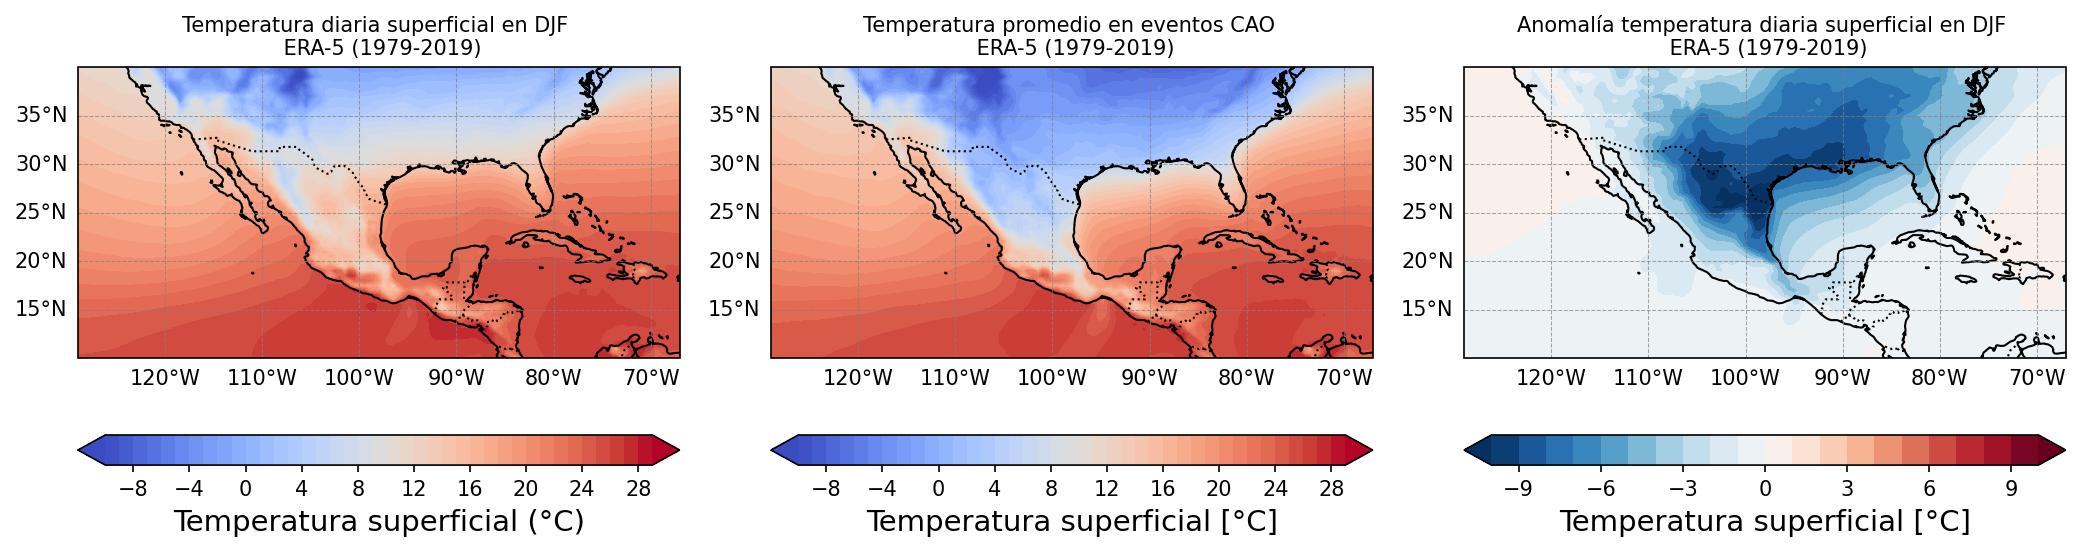

In [62]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

# Subplot 1
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
cs = ax1.contourf(lons, lats, invs_E5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Temperatura superficial (°C)', fontsize=14)
plt.title('Temperatura diaria superficial en DJF \n ERA-5 (1979-2019)', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
cs = ax2.contourf(lons, lats,E5_total_caos, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura promedio en eventos CAO \n ERA-5 (1979-2019)', fontsize=10)

# Subplot 3
ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines()
cs = ax3.contourf(lons, lats, E5_anomalia, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax3.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax3)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Anomalía temperatura diaria superficial en DJF \n ERA-5 (1979-2019)', fontsize=10)

plt.tight_layout(h_pad=2, pad=1)
plt.show()
